# Test Image Processing (1366 x 768 pciture)

# Import Library

In [50]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Import Raw Photos

In [51]:
img = cv2.imread("../data/photos/raw/test_4.jpg")

if img.shape[1]/img.shape[0] == 1366/768 and img.shape[1] != 1366:
    img = cv2.resize(img, [1366, 768])
elif img.shape[1]/img.shape[0] == 1366/768 and img.shape[1] == 1366:
    pass
else: 
    raise ValueError("The image is not 1366:768")
    
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

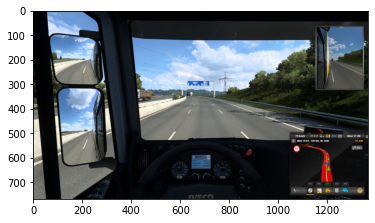

width:   1366
height:  768
channel: 3


In [52]:
plt.imshow(img)
plt.show()
IMAGE_H, IMAGE_W, IMAGE_CHANNELS = img.shape
print('width:  ', IMAGE_W)
print('height: ', IMAGE_H)
print('channel:', IMAGE_CHANNELS)

# Image Pre-Processing

## ROI Cropping

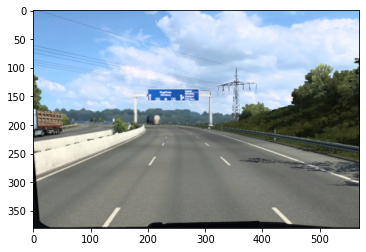

width:   570
height:  380
channel: 3


In [53]:
img_crop = img[150:530, 430:1000] # Apply np slicing for ROI crop
plt.imshow(img_crop)
plt.show()

IMAGE_CROP_H, IMAGE_CROP_W, IMAGE_CROP_CHANNELS = img_crop.shape
print('width:  ', IMAGE_CROP_W)
print('height: ', IMAGE_CROP_H)
print('channel:', IMAGE_CROP_CHANNELS)

## Exposure Correction

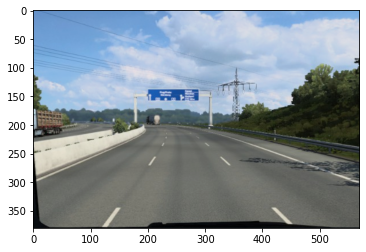

In [54]:
exp_cor = cv2.convertScaleAbs(img_crop, alpha=0.9, beta=0)
plt.imshow(exp_cor)
plt.show()

## Bird Eye View v2

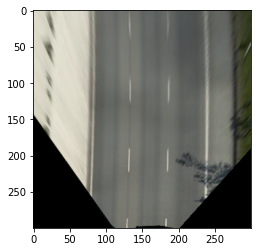

width:   300
height:  300
channel:  3


In [55]:
#Setting up the point for perspective
pts1 = np.float32([[100, IMAGE_CROP_H], [200, 220], [300, 220], [410, IMAGE_CROP_H]])
pts2 = np.float32([[125, 300], [100, 0], [200, 0], [175, 300]])
matrix = cv2.getPerspectiveTransform(pts1, pts2)
matrix_inv = cv2.getPerspectiveTransform(pts2, pts1)

bird_eye = cv2.warpPerspective(exp_cor, matrix, (300,300))
plt.imshow(bird_eye)
plt.show()
IMAGE_BirdEye_H, IMAGE_BirdEye_W, IMAGE_BirdEye_CHANNELS = bird_eye.shape
print('width:  ', IMAGE_BirdEye_H)
print('height: ', IMAGE_BirdEye_W)
print('channel: ', IMAGE_BirdEye_CHANNELS)

# HLS Conversion

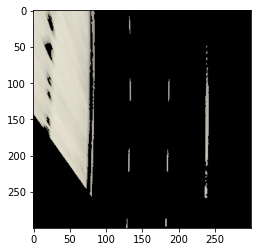

In [56]:
hls = cv2.cvtColor(bird_eye, cv2.COLOR_RGB2HLS)
Lchannel = hls[:,:,1]
mask = cv2.inRange(Lchannel, 140, 255)
hls_res = cv2.bitwise_and(bird_eye,bird_eye, mask= mask)
plt.imshow(hls_res)
plt.show()

# Gray Image

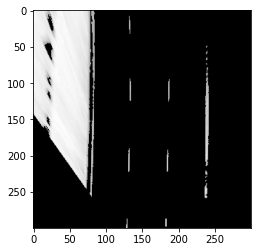

In [57]:
gray = cv2.cvtColor(hls_res,cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap="gray")
plt.show()

## Black and White Conversion

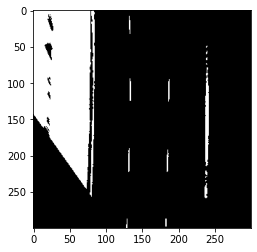

In [58]:
(thresh, black_and_white) = cv2.threshold(gray, 130, 255, cv2.THRESH_BINARY)
plt.imshow(black_and_white, cmap="gray")
plt.show()